In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [2]:
df = pd.read_csv(r"C:\Users\sageo\OneDrive\Desktop\Projects\Projects\driver-data.csv",index_col=0)

In [3]:
df

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25
...,...,...
3423310685,160.04,10
3423312600,176.17,5
3423312921,170.91,12


In [4]:
df.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041522,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


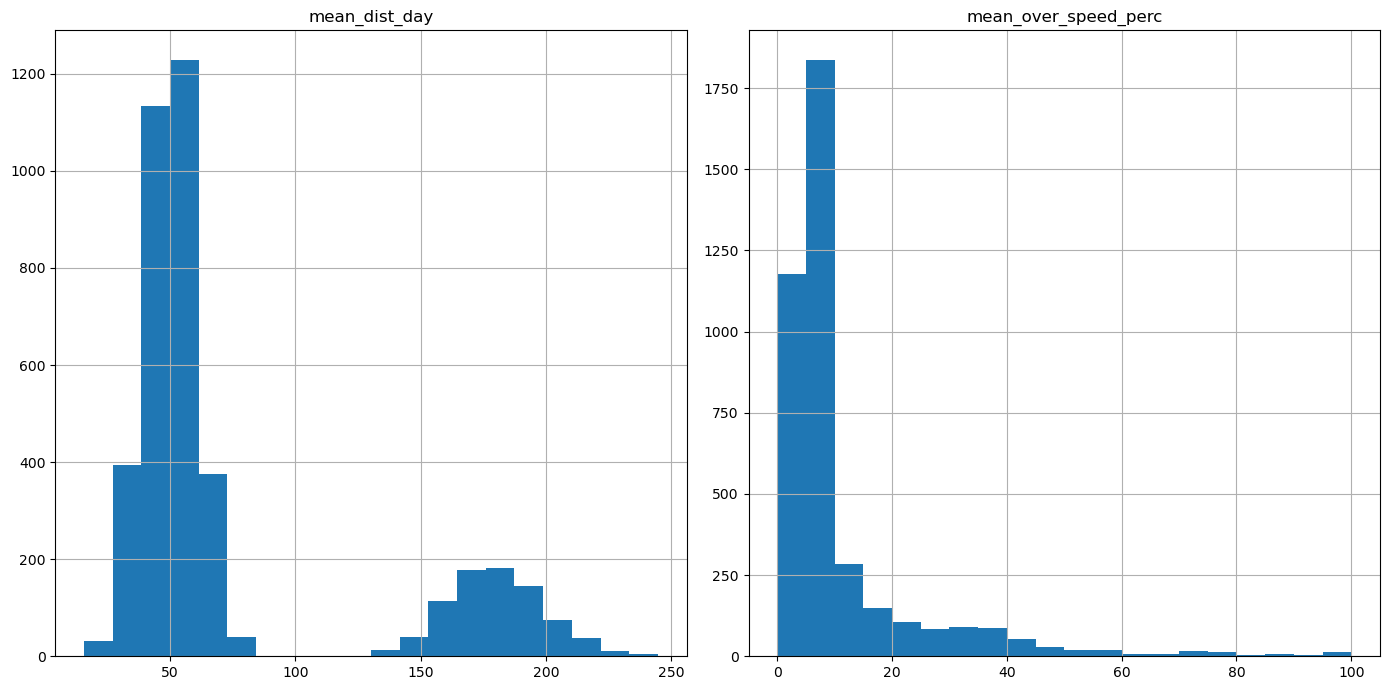

In [5]:
df.hist(bins=20, figsize=(14, 7), layout=(1,2))
plt.tight_layout()
plt.show()

C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\clust

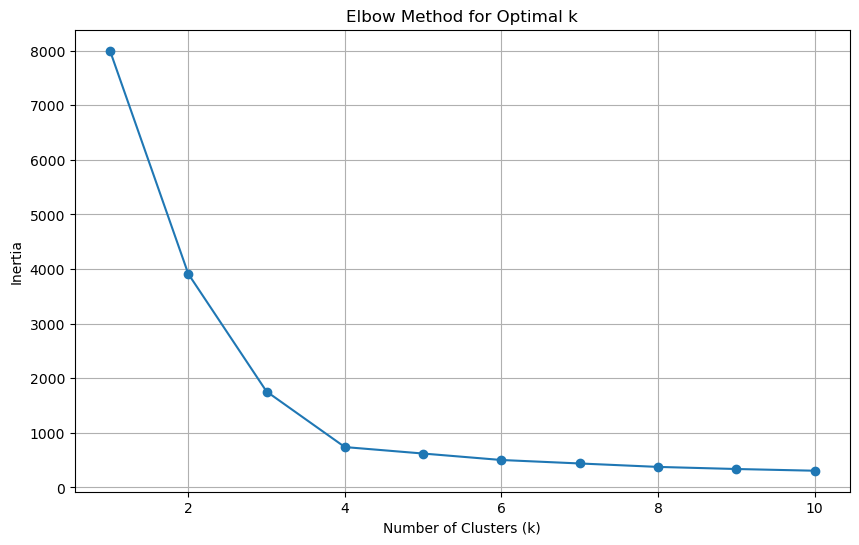

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 1. Data Preprocessing
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# 2. Determine Optimal Number of Clusters (k) using Elbow Method
inertia = []
k_range = range(1, 11)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sageo\anaconda3\lib\site-packages\sklearn\clust

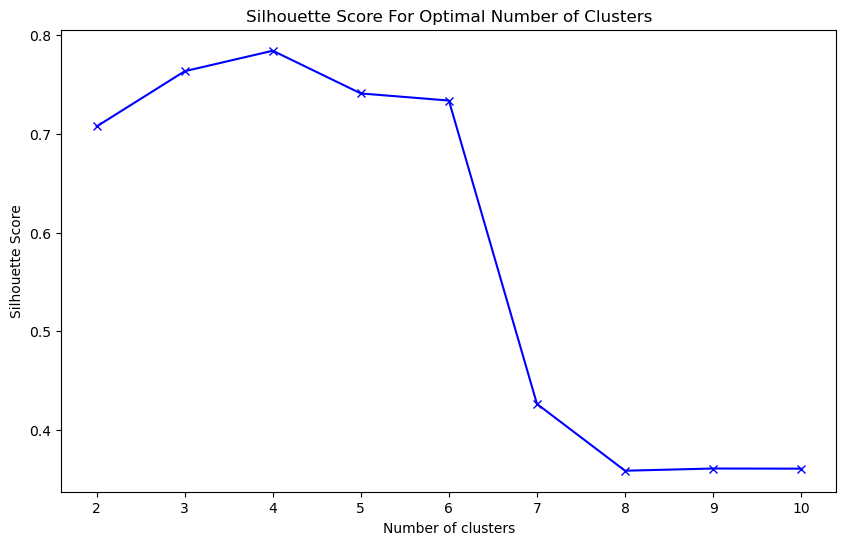

In [7]:
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.show()

C:\Users\sageo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
            mean_dist_day  mean_over_speed_perc
Cluster 0     177.835096             70.288462
Cluster 1      50.404824             32.365340
Cluster 2      50.016637              5.204037
Cluster 3     180.434863             10.529496
Silhouette Score: 0.784


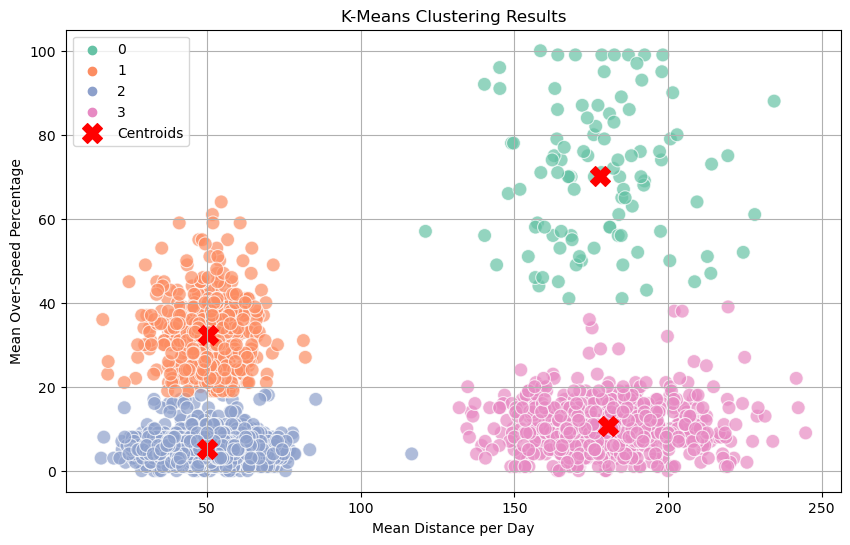

In [8]:
# 3. Apply K-Means Clustering with the chosen k
optimal_k = 4  # Example value; choose based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 4. Cluster Analysis
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)

# Display cluster centers
cluster_centers_df = pd.DataFrame(centroids, columns=df.columns[:-1], index=[f'Cluster {i}' for i in range(optimal_k)])
print("Cluster Centers:\n", cluster_centers_df)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

# 5. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mean_dist_day', y='mean_over_speed_perc', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('Mean Distance per Day')
plt.ylabel('Mean Over-Speed Percentage')
plt.title('K-Means Clustering Results')
plt.legend()
plt.grid(True)
plt.show()

# Insights: 

In [13]:
# Define incentives based on clusters
def assign_incentives(cluster):
    if cluster == 0:
        return 'High Incentive'
    elif cluster == 1:
        return 'Medium Incentive'
    elif cluster == 2:
        return 'Low Incentive'
    else:
        return 'Vey Low Incentive'

# Apply the function to assign incentives
df['Incentive'] = df['Cluster'].apply(assign_incentives)

# Group drivers by cluster and aggregate the information
cluster_groups = df.groupby('Cluster').agg({
    'Incentive': 'first',  # Assuming each cluster has a single incentive
    'mean_dist_day': ['mean', 'std'],  # Example statistics
    'mean_over_speed_perc': ['mean', 'std']  # Example statistics
}).reset_index()

# Print the grouped data with incentives
cluster_groups

Cluster          Incentive mean_dist_day            mean_over_speed_perc  \
                       first          mean        std                 mean   
0       0     High Incentive    177.835096  20.180884            70.288462   
1       1   Medium Incentive     50.404824   9.762079            32.365340   
2       2      Low Incentive     50.016637  10.255611             5.204037   
3       3  Vey Low Incentive    180.434863  18.893287            10.529496   

              
         std  
0  16.590249  
1   8.691776  
2   2.326916  
3   5.686724